In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from  sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
df = df[df["Species"]!="Iris-virginica"]

In [12]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [13]:
df["Species"] = df["Species"].map(
    {
        "Iris-setosa" : 0,
        "Iris-versicolor" : 1
    }
)

In [14]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [15]:
df["Species"].value_counts()

0    50
1    50
Name: Species, dtype: int64

In [16]:
X = df.copy()
X = X.drop(columns=["Species"], axis=1)
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [19]:
knn = KNeighborsClassifier()
params = {
    "n_neighbors" : [3,10,15,20]
}
scoring = {
    "accuracy" : "accuracy",
    "precision" : "precision",
    "recall" : "recall",
    "f1" : "f1"
}
model = GridSearchCV(knn, params, scoring=scoring, cv=5, refit="accuracy").fit(X_train, y_train)

In [20]:
y_pred = model.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



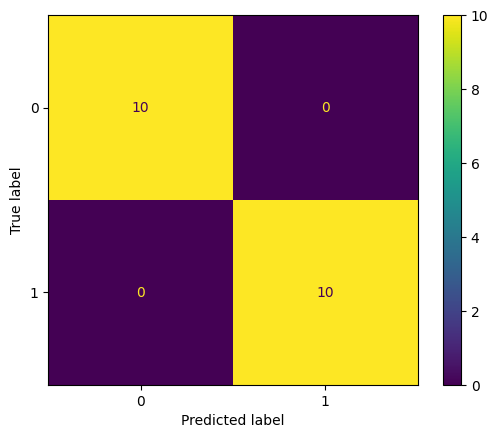

In [23]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()